In [67]:
import pandas as pd
import seaborn as sns

In [68]:
df = pd.read_csv("mncsalary.csv")

In [69]:
df=pd.DataFrame(data=df)

In [70]:
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [72]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

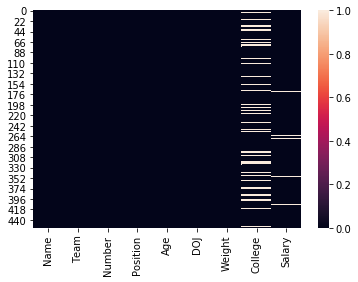

In [73]:
sns.heatmap(df.isnull())

In [74]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [75]:
df=df.drop(['Name','College','DOJ'],axis=1)

In [76]:
df.head()

,Team,Number,Position,Age,Weight,Salary
0,Boston Celtics,0,PG,25,180,7730337.0
1,Boston Celtics,99,SF,25,235,6796117.0
2,Boston Celtics,30,SG,27,205,NaN
3,Boston Celtics,28,SG,22,185,1148640.0
4,Boston Celtics,8,PF,29,231,5000000.0


In [77]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')

In [78]:
df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))

In [79]:
df.isnull().sum()

Team        0
Number      0
Position    0
Age         0
Weight      0
Salary      0
dtype: int64

In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [81]:
list=['Team','Position']

In [82]:
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [83]:
df

,Team,Number,Position,Age,Weight,Salary
0,1,0,2,25,180,7.730337e+06
1,1,99,3,25,235,6.796117e+06
2,1,30,4,27,205,4.842684e+06
3,1,28,4,22,185,1.148640e+06
4,1,8,1,29,231,5.000000e+06
...,...,...,...,...,...,...
452,28,41,1,20,234,2.239800e+06
453,28,8,2,26,203,2.433333e+06
454,28,25,2,24,179,9.000000e+05
455,28,21,0,26,256,2.900000e+06


In [84]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))

In [85]:
df_new=df[(z<3).all(axis=1)]

In [86]:
df_new.shape

(443, 6)

In [38]:
df.shape

(457, 6)

In [87]:
df=df_new

In [88]:
x=df.iloc[:,0:-1]

In [89]:
y=df.iloc[:,-1]

In [90]:
x

,Team,Number,Position,Age,Weight
0,1,0,2,25,180
2,1,30,4,27,205
3,1,28,4,22,185
4,1,8,1,29,231
6,1,55,1,21,235
...,...,...,...,...,...
452,28,41,1,20,234
453,28,8,2,26,203
454,28,25,2,24,179
455,28,21,0,26,256


In [91]:
y

0      7.730337e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
6      1.170960e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 443, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [93]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
rfr.score(x_train,y_train)

0.8471337511852918

In [98]:
from sklearn import externals
import joblib
joblib.dump(rfr,'mncsalary.pkl')

['mncsalary.pkl']